# Sales and Customer Behavior Analysis (Supermarket Sales)

**Dataset:** Supermarket Sales
https://www.kaggle.com/datasets/faresashraf1001/supermarket-sales

The goal is to perform a full analysis cycle: data understanding, EDA, confidence intervals, hypothesis testing, and two analytical parts: regression and time series analysis.


## Environment preparation

- Import the main libraries.
- Ensure that the graphs are clear (titles, axes).


In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from scipy.stats import skew

import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

plt.rcParams["figure.figsize"] = (10, 5)
plt.rcParams["axes.grid"] = True


In [2]:
df = pd.read_csv("data/SuperMarketAnalysis.csv")
df.head()


,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Sales,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,Alex,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,1:08:00 PM,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,Giza,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29:00 AM,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,Alex,Yangon,Normal,Female,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,1:23:00 PM,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,Alex,Yangon,Member,Female,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,8:33:00 PM,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,Alex,Yangon,Member,Female,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37:00 AM,Ewallet,604.17,4.761905,30.2085,5.3


## Understanding and Preparing Data

- Check data size (`shape`) and column names.
- Check data types (`info`).
- Check for missing values.
- If there is a date column (e.g. `Date`), convert to datetime.
- If necessary, fix incorrect data types (e.g. `Total` to float).


In [3]:
print(f'Rows and columns: {df.shape}')
print(f'Columns names: {df.columns.tolist()}')


Rows and columns: (1000, 17)
Columns names: ['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender', 'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Sales', 'Date', 'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income', 'Rating']


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Sales                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [5]:
# missing values

df.isna().sum().sort_values(ascending=False)

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Sales                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [6]:
df["Date"] = pd.to_datetime(df["Date"])

df.head()


,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Sales,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,Alex,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,1:08:00 PM,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,Giza,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29:00 AM,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,Alex,Yangon,Normal,Female,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,1:23:00 PM,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,Alex,Yangon,Member,Female,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,8:33:00 PM,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,Alex,Yangon,Member,Female,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37:00 AM,Ewallet,604.17,4.761905,30.2085,5.3


In [7]:
# # function that finds the unique values ​​of each column (this allows you to analyze each column):

def unique_values(df):
    for each_column in df.columns:
        unique_value = df[each_column].unique().tolist() # Paverčiame į sąrašą
        print(f"Columns: **{each_column}**")
        print(f"Values ({len(unique_value)}): {unique_value}")
        print("-" * 30)

unique_values(df)

Columns: **Invoice ID**
Values (1000): ['750-67-8428', '226-31-3081', '631-41-3108', '123-19-1176', '373-73-7910', '699-14-3026', '355-53-5943', '315-22-5665', '665-32-9167', '692-92-5582', '351-62-0822', '529-56-3974', '365-64-0515', '252-56-2699', '829-34-3910', '299-46-1805', '656-95-9349', '765-26-6951', '329-62-1586', '319-50-3348', '300-71-4605', '371-85-5789', '273-16-6619', '636-48-8204', '549-59-1358', '227-03-5010', '649-29-6775', '189-17-4241', '145-94-9061', '848-62-7243', '871-79-8483', '149-71-6266', '640-49-2076', '595-11-5460', '183-56-6882', '232-16-2483', '129-29-8530', '272-65-1806', '333-73-7901', '777-82-7220', '280-35-5823', '554-53-8700', '354-25-5821', '228-96-1411', '617-15-4209', '132-32-9879', '370-41-7321', '727-46-3608', '669-54-1719', '574-22-5561', '326-78-5178', '162-48-8011', '616-24-2851', '778-71-5554', '242-55-6721', '399-46-5918', '106-35-6779', '635-40-6220', '817-48-8732', '120-06-4233', '285-68-5083', '803-83-5989', '347-34-2234', '199-75-8169', 

In [8]:
# check if there are any duplicates in the 'invoice_id' column. If there are none, we can delete this column, it is not needed for analysis.
df['Invoice ID'].duplicated().sum()

np.int64(0)

In [9]:
df.drop('Invoice ID', axis=1, inplace=True)
df.head(3)

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Sales,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,Alex,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,1:08:00 PM,Ewallet,522.83,4.761905,26.1415,9.1
1,Giza,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29:00 AM,Cash,76.40,4.761905,3.8200,9.6
2,Alex,Yangon,Normal,Female,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,1:23:00 PM,Credit card,324.31,4.761905,16.2155,7.4


## EDA


In [10]:
# main statistics
df.describe().T

,count,mean,min,25%,50%,75%,max,std
Unit price,1000.0,55.67213,10.08,32.875,55.23,77.935,99.96,26.494628
Quantity,1000.0,5.51,1.0,3.0,5.0,8.0,10.0,2.923431
Tax 5%,1000.0,15.379369,0.5085,5.924875,12.088,22.44525,49.65,11.708825
Sales,1000.0,322.966749,10.6785,124.422375,253.848,471.35025,1042.65,245.885335
Date,1000,2019-02-14 00:05:45.600000,2019-01-01 00:00:00,2019-01-24 00:00:00,2019-02-13 00:00:00,2019-03-08 00:00:00,2019-03-30 00:00:00,NaN
cogs,1000.0,307.58738,10.17,118.4975,241.76,448.905,993.0,234.17651
gross margin percentage,1000.0,4.761905,4.761905,4.761905,4.761905,4.761905,4.761905,0.0
gross income,1000.0,15.379369,0.5085,5.924875,12.088,22.44525,49.65,11.708825
Rating,1000.0,6.9727,4.0,5.5,7.0,8.5,10.0,1.71858


In [11]:
# Although describe() gives us basic descriptive data, it makes sense to create a function that will provide additional statistical indicators.

def get_statistics(df, column):
    data_column = df[column].dropna()
    
    stats = {
        "Mean": data_column.mean(),
        "Median": data_column.median(),
        "Std": data_column.std(),
        "Min value": data_column.min(),
        "Max value": data_column.max(),
        "Q1": data_column.quantile(0.25),
        "Q3": data_column.quantile(0.75),
        "Skewness": skew(data_column),
        "Coefficient of variation (%)": (data_column.std() / data_column.mean()) * 100
    }
    
    return pd.Series(stats)

Our target (y) is the 'Sales' column. The entire analysis is designed to analyze sales, how effectively they influence sales, and to make sales forecasts using linear regression and time line analysis.

In [12]:
# function that displays a graph (fig) and two axes (ax1, ax2), we will display a histogram and a boxplot on the same graph.

def plot_distribution_and_outliers(df, column, hist_color="skyblue", box_color="plum"):
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

    # Left side: Histogram
    sns.histplot(df[column], kde=True, ax=ax1, color=hist_color)
    ax1.set_title(f"{column} - Distribution", fontsize=14)
    ax1.set_xlabel(column)
    ax1.set_ylabel("Count")
    ax1.grid(True, alpha=0.3)

    # Right side: Boxplot
    sns.boxplot(x=df[column], ax=ax2, color=box_color)
    ax2.set_title(f"{column} - Outliers", fontsize=14)
    ax2.set_xlabel(column)
    ax2.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

# plot_distribution_and_outliers(df, "Sales")

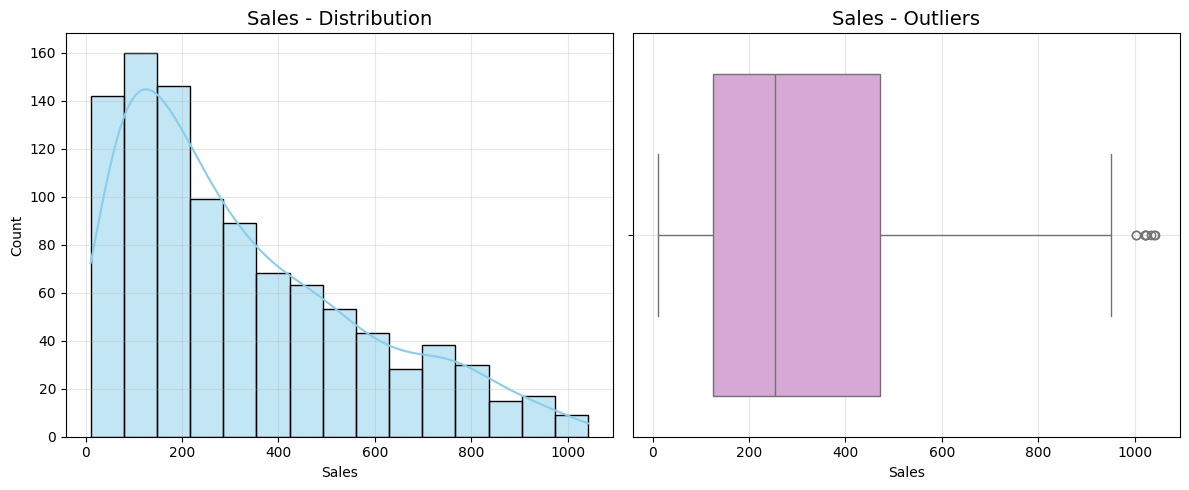

In [13]:
plot_distribution_and_outliers(df, "Sales")

In [14]:
statistika_sales = get_statistics(df, 'Sales')
print(statistika_sales)

Mean                             322.966749
Median                           253.848000
Std                              245.885335
Min value                         10.678500
Max value                       1042.650000
Q1                               124.422375
Q3                               471.350250
Skewness                           0.891230
Coefficient of variation (%)      76.133328
dtype: float64


The histogram distribution is right-skewed, it does not form a Gaussian bell shape. This means that there are sales that stand out very strongly from the general whole. Most sales are relatively small (concentrated between 0 and 400), but there are isolated cases when the amounts reach 1000 and more. We can also justify this by looking at the boxplot: we see large outliers, which reach about 1000 euros.
The skew indicator (0.89) also shows that the distribution is asymmetric, there are several large outliers.

According to the boxplot and statistics (Q1, Q3), we see that the main sales are distributed between 124.42 and 471.35 euros.
The mean is 322.97, but it does not reflect the true average sales (it is inflated due to outliers), you need to look at the median.
The median is 253.85. This means that exactly half of all sales are less than 253.85, and the other half are greater.
Mode: The most common sales values ​​are in the range of approximately 100-150 (top column).

**Other numerical variables that would be appropriate to analyze:**

**Unit Price** . This analysis shows the pricing of a product basket. It helps to understand whether your revenue is generated by selling many cheap products or a few expensive ones. If we see outliers: very expensive products that can distort the overall statistics.

**Gross Income**. High sales do not necessarily mean high profits. A boxplot graph will show if there are transactions that generate a disproportionately large share of profits. The distribution helps to determine how profitable the products are the "engine" of your business.

**Rating**. Unlike sales, ratings usually have an upper limit.
Outliers: The most important thing here is to monitor low outliers. These are customers who are very dissatisfied. These are "red flags" that need to be investigated.

**Quantity**. Helps to determine purchasing habits. Distribution: If we see a bimodal distribution (two peaks), it may mean that we have two different groups of customers.

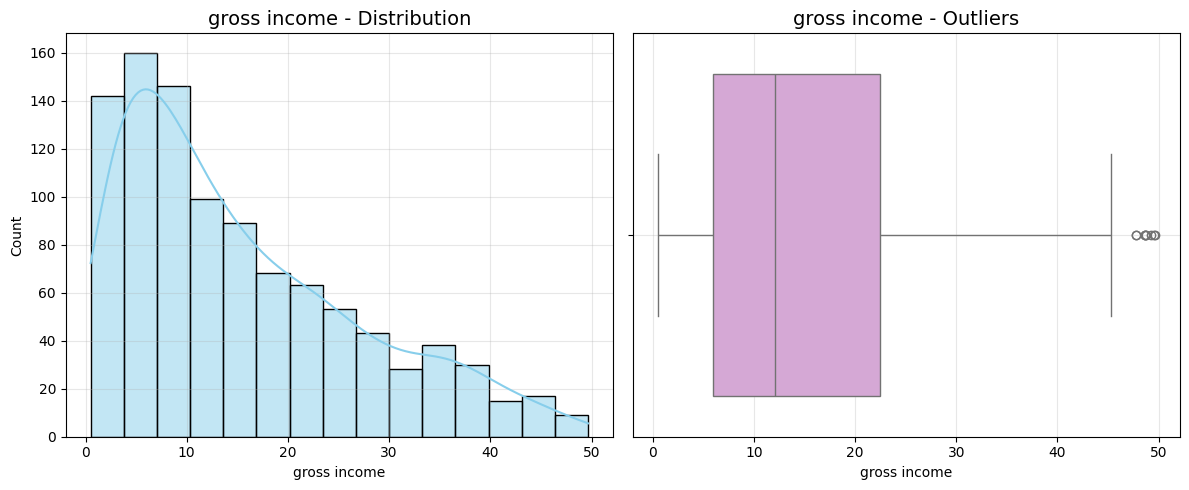

In [15]:
plot_distribution_and_outliers(df, "gross income")

In [16]:
statistika_gross_income = get_statistics(df, 'gross income')
print(statistika_gross_income)

Mean                            15.379369
Median                          12.088000
Std                             11.708825
Min value                        0.508500
Max value                       49.650000
Q1                               5.924875
Q3                              22.445250
Skewness                         0.891230
Coefficient of variation (%)    76.133328
dtype: float64


The situation for 'Gross Income' is very similar to that for 'Sales': a skewed distribution with a long tail to the right, indicating that there are outliers. This means that most sales generate a small gross profit (concentrated around 5.9-22.4 euros), but there are also transactions with gross profits exceeding 45 euros.
The median is 12.08 euros. This is the "typical" profit from a single sale.

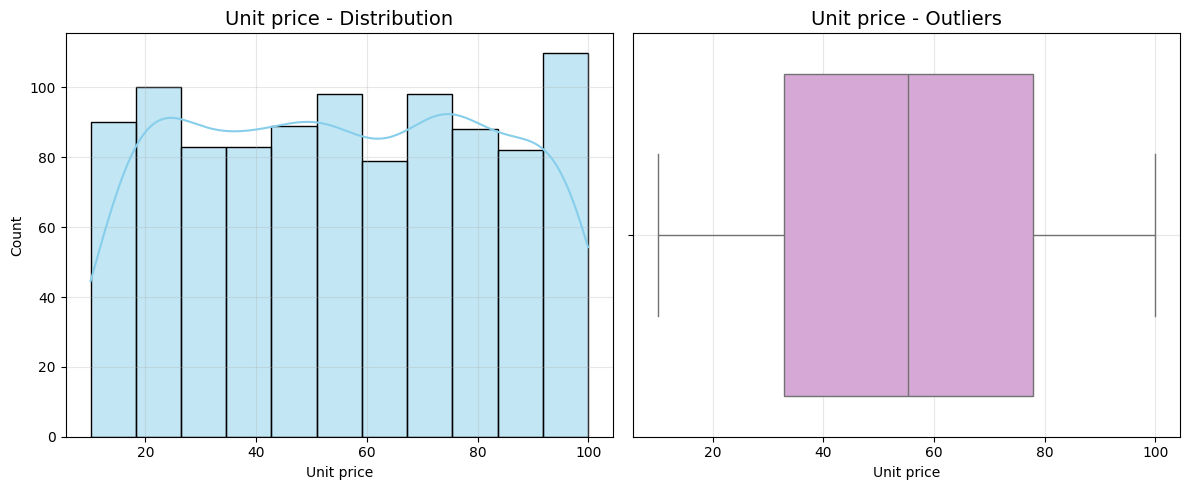

In [17]:
plot_distribution_and_outliers(df, "Unit price")

In [18]:
statistika_unit_price = get_statistics(df, 'Unit price')
print(statistika_unit_price)

Mean                            55.672130
Median                          55.230000
Std                             26.494628
Min value                       10.080000
Max value                       99.960000
Q1                              32.875000
Q3                              77.935000
Skewness                         0.007067
Coefficient of variation (%)    47.590470
dtype: float64


The distribution of unit prices is surprisingly even (Uniform distribution).

The histogram does not have a single sharp peak (mode). The bars fluctuate at a similar level, which means that the assortment contains a similar amount of both cheap (from €10), medium and expensive (up to €100) products.

The boxplot graph confirms that pricing is very balanced:
The median is around €55. This means that half of the products cost less than €55, and the other half more.

Absence of outliers: There are no outliers in the graph. This means that pricing is predictable and there are no “extremely” expensive products that would distort the overall statistics.

50% of all your products fall into the segment from €32.88 to €77.94.

Price stability. Since the distribution is even, the value of shopping cart will depend mostly on the quantity of items (Quantity), and not on whether they accidentally chose one very expensive item.

Correlation with margin. The margin is fixed everywhere (4.76%). This means that selling an item for €100 earns exactly 10 times more net profit than selling an item for €10. With such an even price distribution, the goal should be to promote the more expensive segment of items (€70–100), as they generate the highest absolute profit at the same margin.

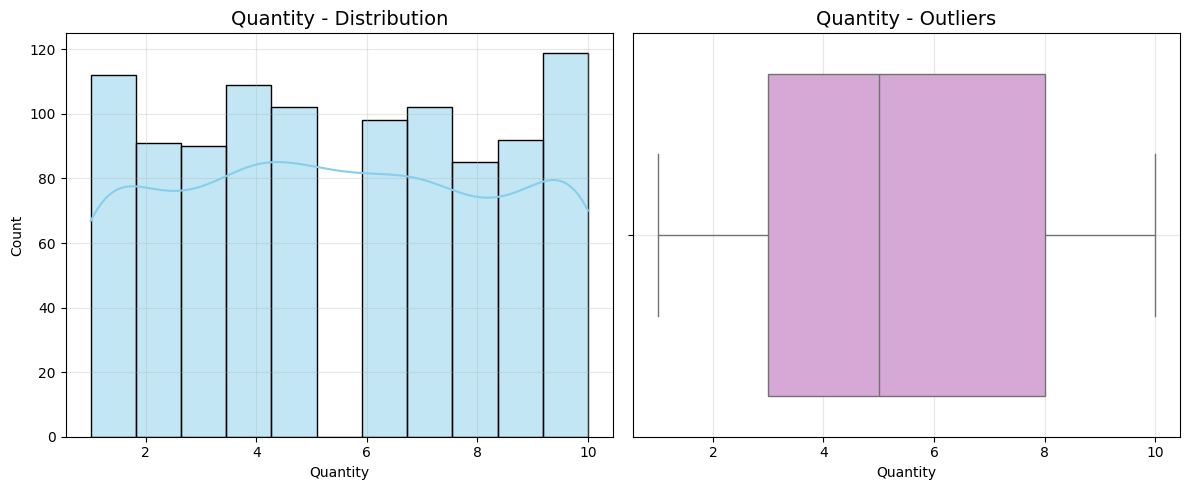

In [19]:
plot_distribution_and_outliers(df, "Quantity")

In [20]:
statistika_quantity = get_statistics(df, 'Quantity')
print(statistika_quantity)

Mean                             5.510000
Median                           5.000000
Std                              2.923431
Min value                        1.000000
Max value                       10.000000
Q1                               3.000000
Q3                               8.000000
Skewness                         0.012922
Coefficient of variation (%)    53.056817
dtype: float64


The Quantity distribution is also uniform, with no extreme outliers.
Buyers buy any quantity of goods from 1 to 10 at a time with almost equal frequency.
The most common quantity purchased is 10 units, but 50 percent of goods are purchased in the range between 3 and 8 units.

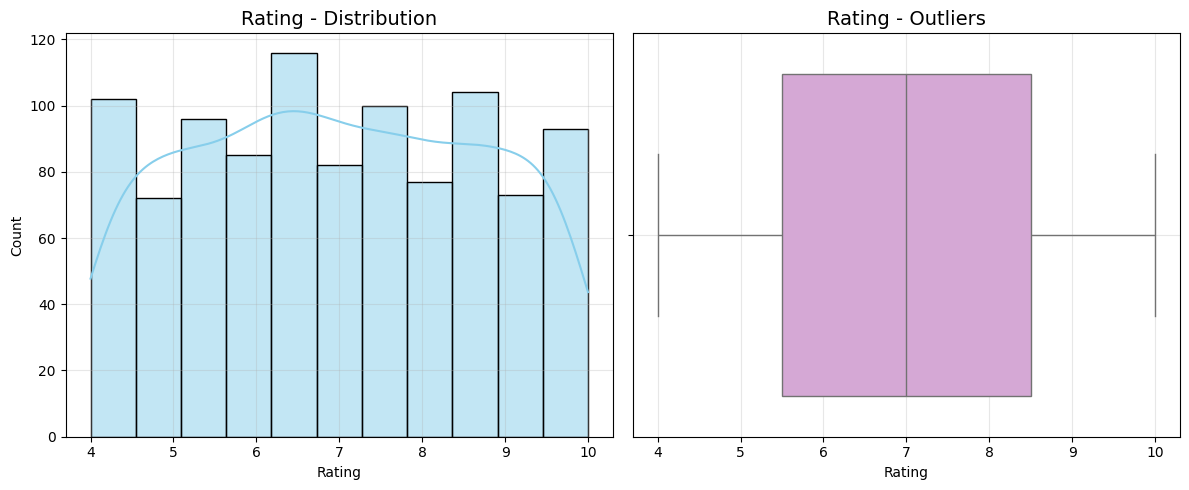

In [21]:
plot_distribution_and_outliers(df, "Rating")

In [22]:
statistika_rating = get_statistics(df, 'Rating')
print(statistika_rating)

Mean                             6.972700
Median                           7.000000
Std                              1.718580
Min value                        4.000000
Max value                       10.000000
Q1                               5.500000
Q3                               8.500000
Skewness                         0.008996
Coefficient of variation (%)    24.647271
dtype: float64


The distribution of product ratings was a bit surprising, as I expected more favorable product ratings. However, the histogram and boxplot show that the distribution is quite even, i.e. equally good, average, and bad product ratings.

**Comparing the groups**. First, I will compare the indicators of each 'Branch', then will analyze how sales are distributed between different product categories ('Product line')

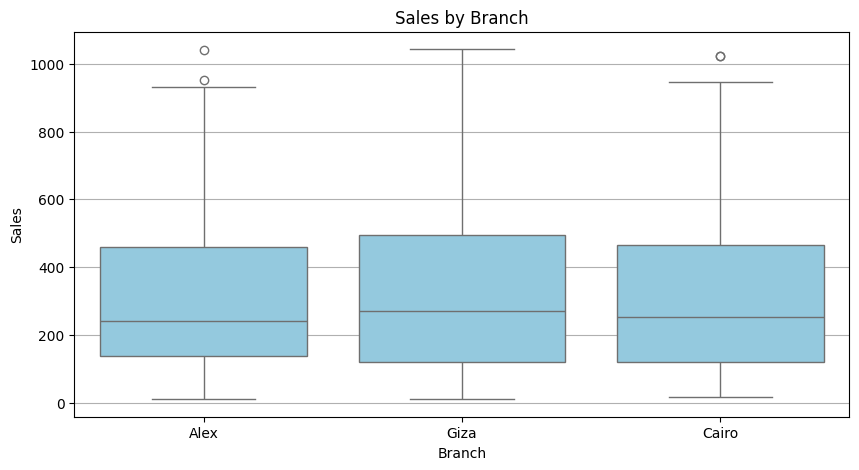

In [23]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x="Branch", y="Sales", color = 'skyblue')
plt.title("Sales by Branch")
plt.xlabel("Branch")
plt.ylabel("Sales")
plt.show()


In [24]:
# Main statistics of each 'Branch' rodiklius

branch_stats = df.groupby('Branch').agg({
    'Sales': ['sum', 'mean', 'median', 'count'],
    'gross income': 'sum'
})


branch_stats.columns = [
    'Total Sales', 'Average Sales', 'Median Sales', 'Count', 
    'Total Gross Income'
]

print(branch_stats)

        Total Sales  Average Sales  Median Sales  Count  Total Gross Income
Branch                                                                     
Alex    106200.3705     312.354031     240.82800    340           5057.1605
Cairo   106197.6720     319.872506     252.88200    332           5057.0320
Giza    110568.7065     337.099715     271.41975    328           5265.1765


From the graph and calculations, we can see that the leading department is Giza: it has the highest median (271.42). This means that the “typical” sales in Giza are higher than in Alex or Cairo. The Giza department is also the leader in terms of sales amount: 110568.71 euros, although the number of orders was slightly lower (328). This means that Giza is able to sell more expensive goods, the average basket in Giza is larger than in other departments.

The other departments also perform well in sales, although slightly lower. In summary, the results of the Alex and Cairo departments are very similar, but Alex has more high outliers (more expensive sales).

The “whiskers” of the Giza department reach the highest limit without outliers, which indicates a healthy and high sales growth potential.

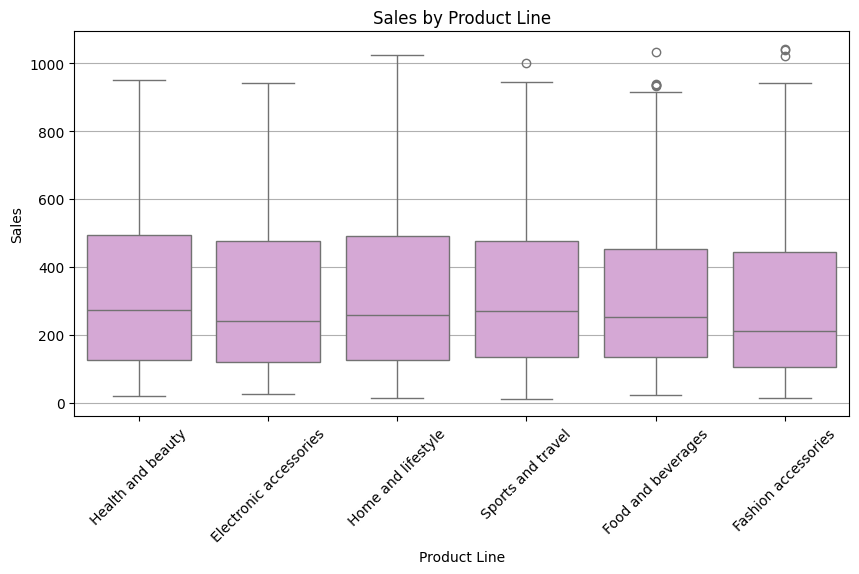

In [25]:
# Comparing Product Line

plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x="Product line", y="Sales", color = 'plum')
plt.title("Sales by Product Line")
plt.xlabel("Product Line")
plt.ylabel("Sales")
plt.xticks(rotation=45)
plt.show()

In [26]:
product_line_stats = df.groupby('Product line').agg({
    'Sales': ['sum', 'mean', 'median', 'count'],
    'gross income': 'sum'
})

product_line_stats.columns = [
    'Total Sales', 'Average Sales', 'Median Sales', 'Count', 
    'Total Gross Income'
]

print(product_line_stats)

                        Total Sales  Average Sales  Median Sales  Count  \
Product line                                                              
Electronic accessories   54337.5315     319.632538     241.21650    170   
Fashion accessories      54305.8950     305.089298     211.64850    178   
Food and beverages       56144.8440     322.671517     252.48825    174   
Health and beauty        49193.7390     323.643020     272.30700    152   
Home and lifestyle       53861.9130     336.636956     258.18975    160   
Sports and travel        55122.8265     332.065220     270.93150    166   

                        Total Gross Income  
Product line                                
Electronic accessories           2587.5015  
Fashion accessories              2585.9950  
Food and beverages               2673.5640  
Health and beauty                2342.5590  
Home and lifestyle               2564.8530  
Sports and travel                2624.8965  


The leader in sales by total sales is Food and beverages.

The Health and beauty category has the lowest number of orders (152), but its average sale (323.64) is higher than that of electronics or fashion. This shows that health and beauty shoppers tend to spend more in one go.

Sales by Product Line chart:
The medians are surprisingly similar (around 250), but the Health and beauty median is one of the highest. This confirms insight about the “higher-end” segment.

Outliers: The most outliers (over 1000) are seen in the Food and beverages and Fashion accessories categories. This shows that these areas tend to have very large one-off orders.

Most profitable: Generated by Food and beverages (2673.56).
Least profitable: Health and beauty (2342.55).

The question arises as to why Health and beauty has the fewest buyers? If it could attract the same number of buyers as the fashion segment (178), while maintaining its current high average basket, it would be one of the most profitable categories.

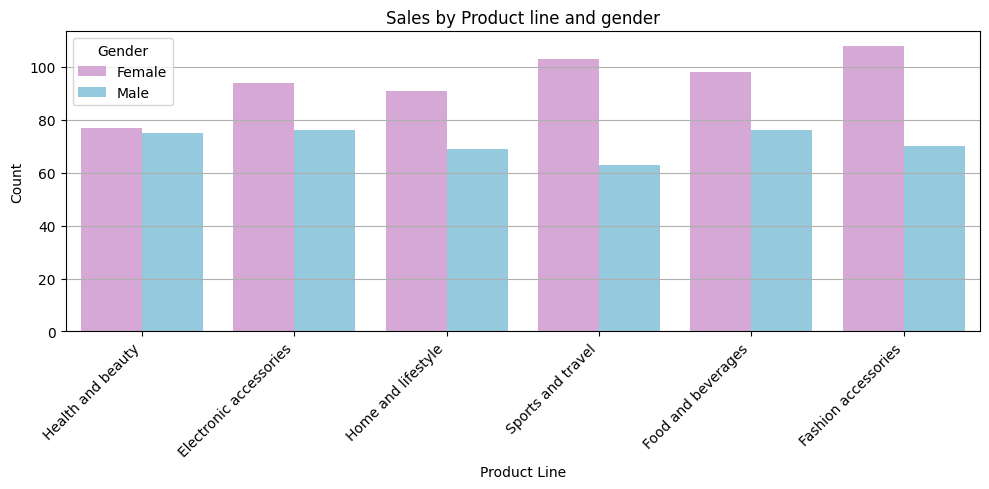

In [27]:
# Comparing what impact is made by gender to the Product Line's sales

custom_palette = {"Male": "skyblue", "Female": "plum"}

plt.figure(figsize=(10, 5))
sns.countplot(data=df, x="Product line", hue="Gender", palette=custom_palette)

plt.xticks(rotation=45, ha='right') 
plt.title("Sales by Product line and gender")
plt.xlabel("Product Line")
plt.ylabel("Count")
plt.legend(title="Gender") 
plt.tight_layout()
plt.show()

In all product categories, the majority of buyers are female, but a very interesting insight: in the 'Health and Beauty' category, which generates the lowest sales, the number of male and female buyers is approximately equal. We can assume that sales of products aimed at women should be encouraged: perhaps review and expand the assortment, analyze the market.

**What other indicators are appropriate to analyze:**

**Customer type**. This is one of the most important variables for loyalty analysis. It is important to compare whether loyal members ("Members") buy more expensive goods (have a higher Unit price) than casual buyers. If members buy cheaper goods, perhaps the loyalty program is more focused on discounts, rather than the premium segment.

**Gender**. It is interesting to study whether women and men differ in terms of average rating (Rating) or quantity of goods purchased (Quantity).

**Payment**. Determine whether the payment method affects the purchase amount (Sales).
Business insight: often buyers who pay with credit cards or e-wallets tend to spend more than those who pay in cash.

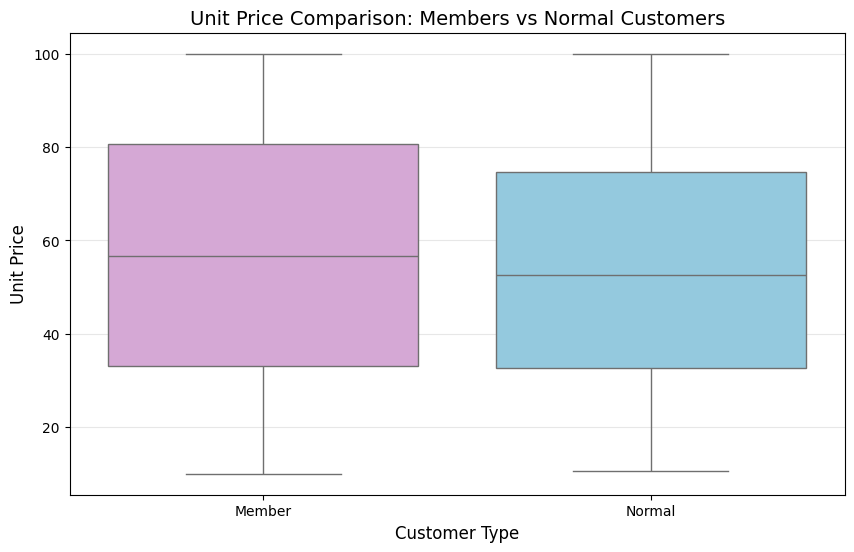

In [28]:
# Compare Unit price by Customer type

custom_colors = {"Member": "plum", "Normal": "skyblue"}

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="Customer type", y="Unit price", hue="Customer type", palette=custom_colors, legend=False)

plt.title("Unit Price Comparison: Members vs Normal Customers", fontsize=14)
plt.xlabel("Customer Type", fontsize=12)
plt.ylabel("Unit Price", fontsize=12)

plt.grid(axis='y', alpha=0.3)
plt.show()

There is a slight difference between loyal member buyers and regular buyers: loyal buyers tended to buy more expensive products, but the difference is not very significant. It is worth analyzing whether there is a premium product segment and whether a sufficient advertising budget is allocated to it.

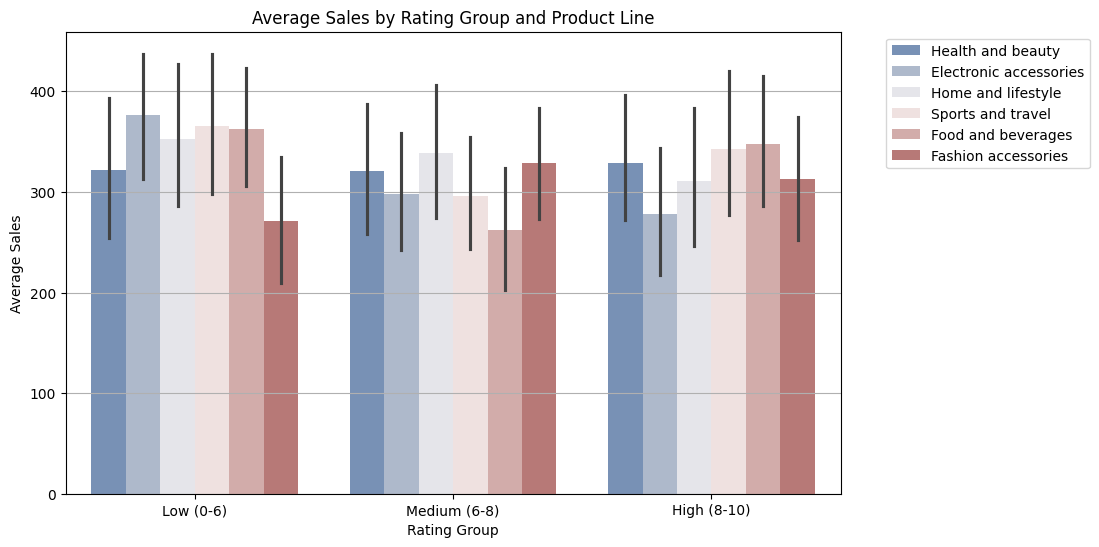

In [29]:
# Compare how product line is rated by customers. 

df['Rating Group'] = pd.cut(df['Rating'], bins=[0, 6, 8, 10], labels=['Low (0-6)', 'Medium (6-8)', 'High (8-10)'])

plt.figure(figsize=(10, 6))
sns.barplot(data=df, x="Rating Group", y="Sales", hue="Product line", palette="vlag")
plt.title("Average Sales by Rating Group and Product Line")
plt.ylabel("Average Sales")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

We see that all product categories have both high and low ratings. There is a noticeable trend that the 'Electronic accessories' category has more low ratings (than high ones). The 'Fashion accessories' category has the fewest low ratings. It would be necessary to analyze the low ratings to find out what the trend is in each category.

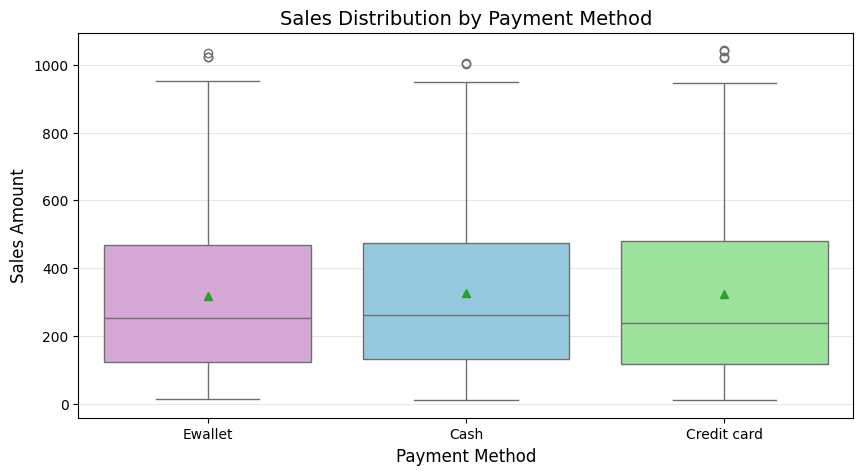

               mean  median        sum
Payment                               
Cash         326.18  262.96  112206.57
Credit card  324.01  239.59  100767.07
Ewallet      318.82  253.68  109993.11


In [30]:
# Payment type: Ewallet - plum, Cash - skyblue, Credit card - lightgreen

payment_colors = {"Ewallet": "plum", "Cash": "skyblue", "Credit card": "lightgreen"}

plt.figure(figsize=(10, 5))

sns.boxplot(data=df, x="Payment", y="Sales", hue="Payment", 
            palette=payment_colors, showmeans=True, 
            legend=False)

plt.title("Sales Distribution by Payment Method", fontsize=14)
plt.xlabel("Payment Method", fontsize=12)
plt.ylabel("Sales Amount", fontsize=12)
plt.grid(axis='y', alpha=0.3)
plt.show()

payment_stats = df.groupby('Payment')['Sales'].agg(['mean', 'median', 'sum']).round(2)
print(payment_stats)

The graph shows the distribution of sales by three payment methods – Ewallet, Cash and Credit card:

The medians of all three methods are very similar and hover around 250. This means that regardless of how the buyer pays, the value of a “typical” purchase remains stable.

We notice that the averages of all groups (around 320–330) are well above the median. This indicates a positive asymmetry – there are many small sales in the business, but the overall average is “inflated” by individual large transactions.

Outliers: In all three methods, we see points above the 1000 mark. This indicates that customers occasionally buy expensive products, both with cash and with cards.

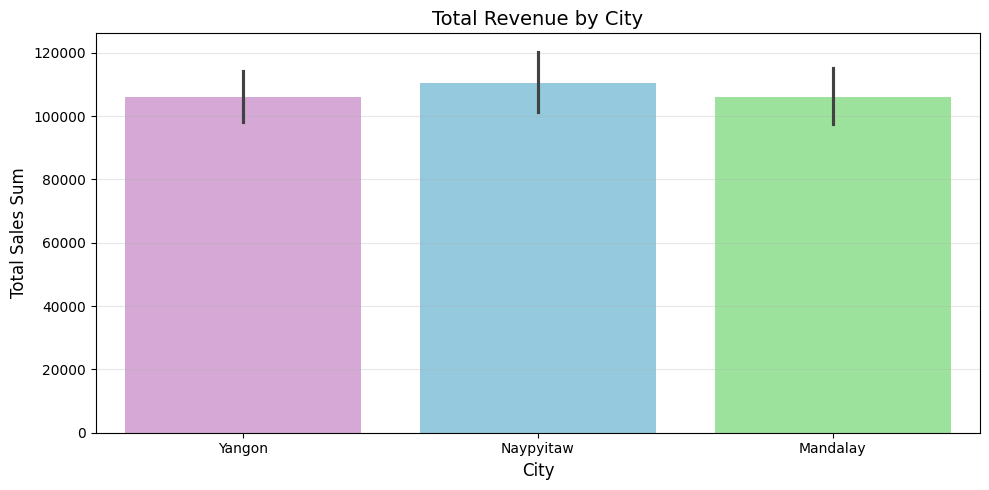

In [31]:
# Sales by City

city_colors = {"Yangon": "plum", "Naypyitaw": "skyblue", "Mandalay": "lightgreen"}

plt.figure(figsize=(10, 5))

sns.barplot(data=df, x="City", y="Sales", estimator=sum, palette=city_colors, hue="City", legend=False)
plt.title("Total Revenue by City", fontsize=14)
plt.xlabel("City", fontsize=12)
plt.ylabel("Total Sales Sum", fontsize=12)
plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

All three cities generate very similar amounts of revenue (sales).

## 95 % CI

In [32]:
#  95 % CI for 'Sales'
col = "Sales"  
x = df[col].dropna().astype(float).values
n = len(x)
mean = x.mean()
std = x.std(ddof=1)

alpha = 0.05
t_crit = stats.t.ppf(1 - alpha/2, df=n-1)
se = std / np.sqrt(n)

ci_low = mean - t_crit * se
ci_high = mean + t_crit * se

mean, (ci_low, ci_high), n


(np.float64(322.966749),
 (np.float64(307.7084118264187), np.float64(338.2250861735813)),
 1000)

A confidence interval (CI) is a statistical measure that helps us understand how confident we can be about the accuracy of our estimated mean.

The results for the **Sales** column are:

* **Estimated mean:** ~322.97
* **95% Confidence Interval:** 307.71 to 338.23
* **Sample size (n):** 1000

We are **95% confident** that the true average of all sales falls within this interval. It is not just a single number, but a "confidence zone".

**Investment planning:** If we would be planning a budget for next year, we could confidently base our budget on this range, knowing that the probability that the average sales will suddenly drop below 307.71 is very small (only 2.5%).

**Safety Buffer:** Even if buyer behavior changes slightly next month, it is likely that average sales will still fluctuate within these safe limits (307.71 – 338.23).
**Critical Assessment:** If the confidence interval had been very wide (e.g., 100 to 500), this would indicate that sales are chaotic and the average cannot be trusted. In this case, the data is reliable.

## Hypothesis testing (H0 and Ha)

Hypothesis: Number of purchases (Count)  
The graph analyzed earlier shows that “Health and beauty” has 152 purchases, and “Fashion accessories” has 178. This is a large difference.  
Question: Is the difference in customer traffic between these two categories random?  
Test: Chi-square, comparing the frequencies of the categories.   

In [33]:
# H0 (Null Hypothesis): The distribution of purchase quantities between the categories “Health and beauty” and “Fashion accessories” is uniform. The observed difference (152 vs 178) is random. 
# # H1 (Alternative Hypothesis): The distribution of purchase quantities between these categories is not random – one category is statistically significantly more popular than the other.

from scipy.stats import chi2_contingency
from scipy.stats import chisquare

# 1. Purchaces: 152 ir 178
observed_counts = [152, 178] 

# Chi-square test
chi2_stat, p_val = chisquare(observed_counts)

print(f"Health & Beauty count: {observed_counts[0]}")
print(f"Fashion accessories count: {observed_counts[1]}")
print(f"Chi-square statistic: {chi2_stat:.4f}")
print(f"P-value: {p_val:.4f}")

if p_val < 0.05:
    print("Reject H0 - The difference in transaction counts is statistically significant.")
else:
    print("Fail to reject H0 - The difference is likely due to random chance.")

Health & Beauty count: 152
Fashion accessories count: 178
Chi-square statistic: 2.0485
P-value: 0.1524
Fail to reject H0 - The difference is likely due to random chance.


The results of the Chi test revealed that the difference in order volume between the 'Health and Beauty' and 'Fashion accessories' categories is random and statistically insignificant.

**T test**  
Hypothesis: Most expensive products. The average for “Health and beauty” is high, but the total is low. We can check whether this category has significantly more expensive products (Unit Price) than “Fashion accessories”.

Question: Do “Health and beauty” products cost more on average than fashion accessories?
Test: t-test for the column Unit Price.

In [35]:
# Health&Beauty vs Fashion accessories by Unit price

def t_test_with_effect_size(df, group_column, value_column, group1, group2):
    """
    Performs an independent samples t-test and calculates Cohen's d effect size.
    
    Cohen's d interpretation:
    < 0.2  — very small effect
    0.2-0.5 — small effect
    0.5-0.8 — medium effect
    > 0.8  — large effect
    """
    # Filter data and remove missing values
    g1 = df[df[group_column] == group1][value_column].dropna()
    g2 = df[df[group_column] == group2][value_column].dropna()
    
    # Welch's t-test (assumes unequal variances)
    t_stat, p_val = stats.ttest_ind(g1, g2, equal_var=False)
    
    # Cohen's d calculation (pooled standard deviation)
    pooled_std = np.sqrt((g1.std()**2 + g2.std()**2) / 2)
    cohens_d   = (g1.mean() - g2.mean()) / pooled_std
    
    print(f"\n{'='*55}")
    print(f"t-test: {value_column} | {group1} vs {group2}")
    print(f"{'='*55}")
    print(f"H0: The means of both groups are equal")
    print(f"Ha: The means are statistically significantly different")
    
    print(f"\n{group1} Mean : {g1.mean():.2f} (n={len(g1)})")
    print(f"{group2} Mean : {g2.mean():.2f} (n={len(g2)})")
    print(f"Mean Difference  : {g1.mean() - g2.mean():.2f}")
    
    print(f"\nt-statistic : {t_stat:.4f}")
    print(f"P-value     : {p_val:.4f}")
    print(f"Cohen's d   : {abs(cohens_d):.3f}")
    
    # Statistical significance logic
    if p_val < 0.05:
        print(f"\n Reject H0 — The difference is STATISTICALLY SIGNIFICANT (p < 0.05)")
    else:
        print(f"\n Fail to reject H0 — The difference is not statistically significant (p = {p_val:.3f})")
    
    # Effect size interpretation
    d = abs(cohens_d)
    if d < 0.2:
        effect = "very small"
    elif d < 0.5:
        effect = "small"
    elif d < 0.8:
        effect = "medium"
    else:
        effect = "large"
        
    print(f"Practical Significance: {effect} effect (Cohen's d = {d:.3f})")

In [36]:
#  Health&Beauty and Fashion accessories Unit price:
t_test_with_effect_size(df, 
                   group_column='Product line', 
                   value_column='Unit price',
                   group1='Health and beauty', 
                   group2='Fashion accessories')


t-test: Unit price | Health and beauty vs Fashion accessories
H0: The means of both groups are equal
Ha: The means are statistically significantly different

Health and beauty Mean : 54.85 (n=152)
Fashion accessories Mean : 57.15 (n=178)
Mean Difference  : -2.30

t-statistic : -0.7857
P-value     : 0.4326
Cohen's d   : 0.087

 Fail to reject H0 — The difference is not statistically significant (p = 0.433)
Practical Significance: very small effect (Cohen's d = 0.087)


**ANOVA** test

In [37]:
# ANOVA. We want to know if the average sales in all departments (Giza, Alex, Cairo) are the same.
# H0: All groups have the same average
# Ha: At least one group has a different average

target = "Sales"
group = "Branch"

groups = [g.dropna().astype(float).values for _, g in df.groupby(group)[target]]
f_stat, p_val = stats.f_oneway(*groups)
f_stat, p_val


(np.float64(0.8845828327760511), np.float64(0.4132101743674147))

F-statistics shows how much the groups differ from each other, compared to how much the data fluctuates within the groups themselves.
A higher number usually means a greater difference between departments. In our case, we see that the number is small, meaning there is not much difference between departments.

p_val (P-value). p > 0.05, means that the difference between departments is not significant, all departments work similarly and generate similar revenues.

## Regression (Machine learning)

Goal: predict the numerical target `Sales`

In [38]:
df.head()

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Sales,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Rating Group
0,Alex,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,1:08:00 PM,Ewallet,522.83,4.761905,26.1415,9.1,High (8-10)
1,Giza,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29:00 AM,Cash,76.40,4.761905,3.8200,9.6,High (8-10)
2,Alex,Yangon,Normal,Female,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,1:23:00 PM,Credit card,324.31,4.761905,16.2155,7.4,Medium (6-8)
3,Alex,Yangon,Member,Female,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,8:33:00 PM,Ewallet,465.76,4.761905,23.2880,8.4,High (8-10)
4,Alex,Yangon,Member,Female,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37:00 AM,Ewallet,604.17,4.761905,30.2085,5.3,Low (0-6)


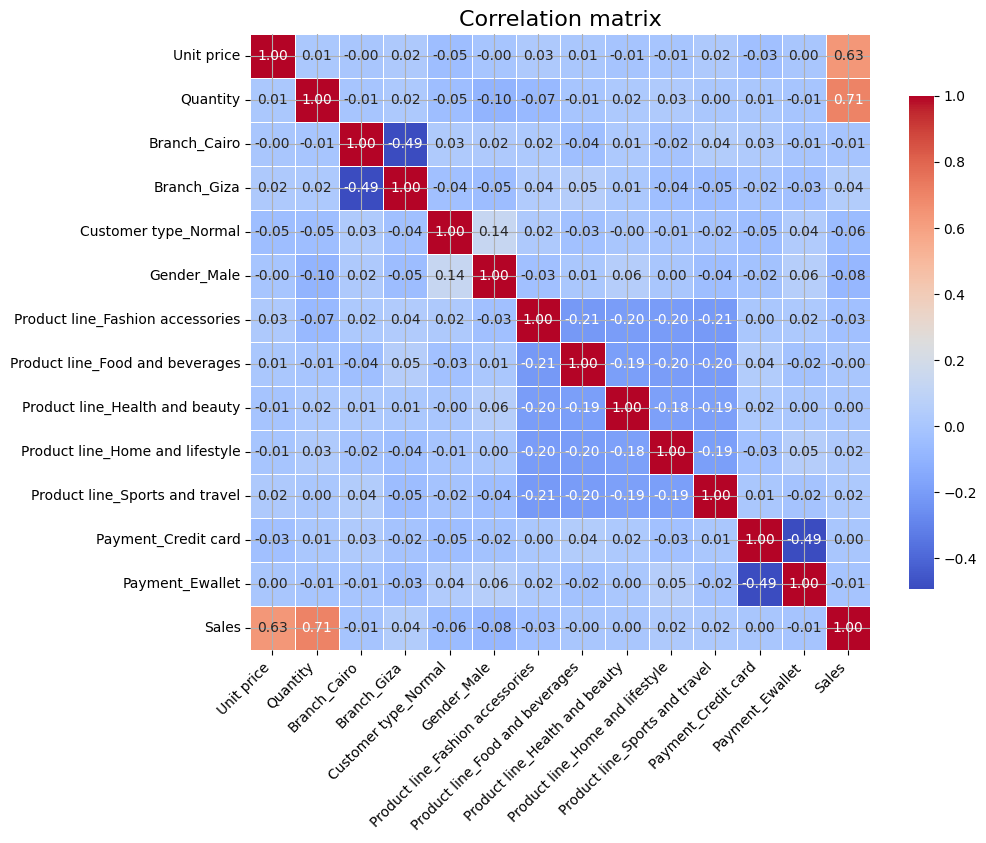

In [39]:
# 1. Selecting variables, converting them to numbers, and creating a correlation matrix
target = "Sales"
feature_cols = ["Unit price", "Quantity", "Branch", "Customer type", "Gender", "Product line", "Payment"]

# 2. Dummy variables
X_raw = df[feature_cols].copy()
y = df[target].astype(float)

X_encoded = pd.get_dummies(X_raw, drop_first=True).astype(float)

# Concating X ir y for correlation
corr_df = pd.concat([X_encoded, y], axis=1)
matrix = corr_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, cbar_kws={"shrink": .8})

plt.title("Correlation matrix", fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.show()


From business logic 'sales' should be the most influenced by price and quantity. I wanted to check this by a correlation matrix. And indeed we see that sales are directly correlated with 'Unit price' (0.63) and quantity (0.71). The relationship is positive, which means that as 'Unit price' and 'Quantity' grow, sales 'Sales' also grow. 

The correlation coefficient is just a number, the scatter plot tells the real "story". The Pearson coefficient can be misleading if the relationship is nonlinear. Therefore, we plot a scatterplot between 'Sales' and these two key variables ('Unit price' and 'Quantity') to confirm the relationship.

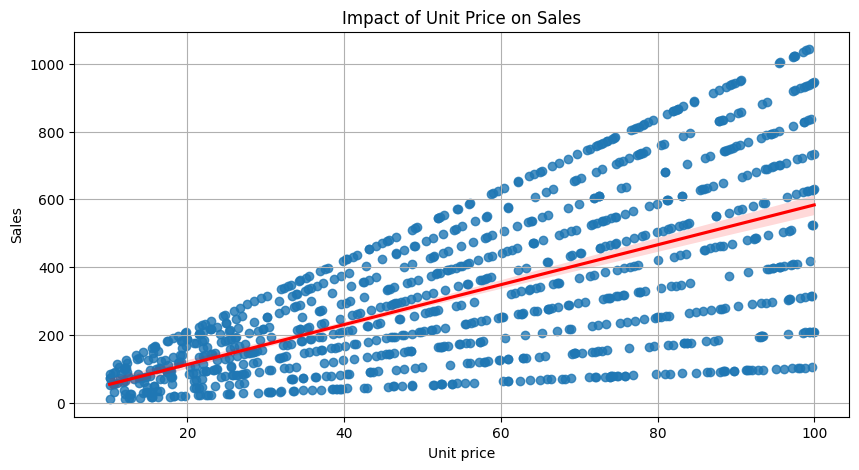

In [40]:
sns.regplot(data=df, x='Unit price', y='Sales', line_kws={'color': 'red'})
plt.title("Impact of Unit Price on Sales")
plt.show()

From the graph, we can see that there is a positive linear relationship between the variables 'Sales' and 'Unit price', which confirms that as the price increases, the sales amount also increases. These variables are suitable for constructing a linear regression model.

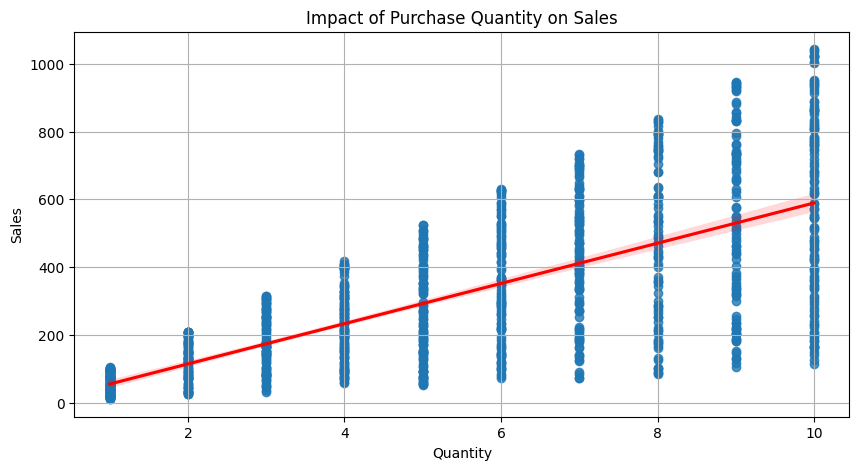

In [41]:
sns.regplot(data=df, x='Quantity', y='Sales', line_kws={'color': 'red'})
plt.title("Impact of Purchase Quantity on Sales")
plt.show()

We see the same situation - the regression line is clearly rising upwards, confirming a strong positive correlation between quantity and 'Sales'. This is visual evidence that says that each additional unit in the basket significantly increases the amount.
The light red background around the line is the confidence interval: this area is very narrow, which indicates that the model would detect this relationship with great confidence.

**OLS** linear regression model

In [42]:
# Linear regression model OLS with all variables (including categorical ones that were converted to numeric)
# Spliting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

X_train_const = sm.add_constant(X_train)

model = sm.OLS(y_train, X_train_const).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.887
Model:                            OLS   Adj. R-squared:                  0.886
Method:                 Least Squares   F-statistic:                     476.4
Date:                Sun, 22 Feb 2026   Prob (F-statistic):               0.00
Time:                        14:49:56   Log-Likelihood:                -4656.9
No. Observations:                 800   AIC:                             9342.
Df Residuals:                     786   BIC:                             9407.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

R^2 (0.887) and Adj.R^2 (0.886) show that the selected variables explain as much as 88.6% of the variation in sales ('Sales'). Such a high indicator shows that sales are very regular and directly depend on price and quantity.   
Only these two variables have a p-value (P>|t|) equal to 0.000, which means that only they have a real influence on the sales amount:  
* Unit price (Coef: 5.8164): each additional euro to the price of the product increases the final sale by an average of €5.82 (holding other variables constant).
* Quantity (Coef: 58.0899): each additional unit in the basket increases the sales amount by as much as €58.09.

The Prob (F-statistic) value is 0.00, which means that the entire model is statistically significant. This is not a coincidence.

The model confirmed that the main drivers of sales are the price of the product and the quantity purchased. Categories, cities or payment methods (p-values ​​> 0.05) do not have a decisive influence on the volume of sales. Customer behavior is very similar in all departments.”

To improve the model, we will be able to discard all insignificant variables and leave only price and quantity, because simplicity in models is always recommended.

In business analytics, it is not enough to simply get a high R^2; it is necessary to check whether the model errors (residuals) are random, as this shows whether the conclusions are not biased.
The Normal Q-Q Plot checks whether the model errors are normally distributed. The blue points should be as close as possible to the straight red line.

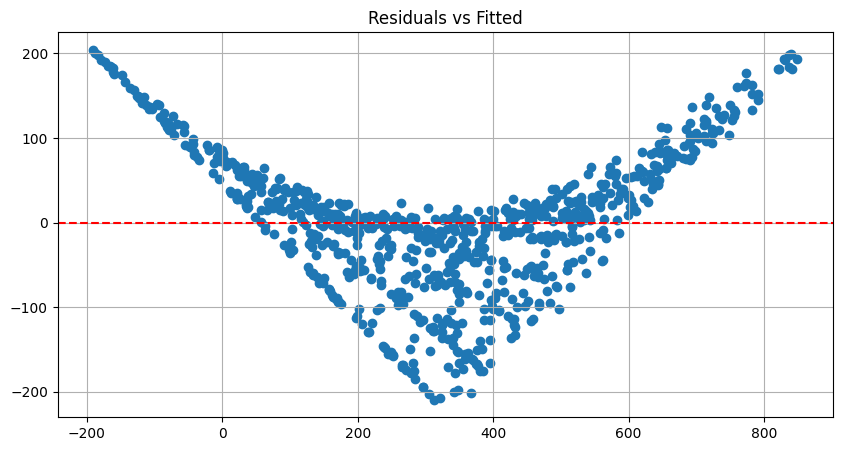

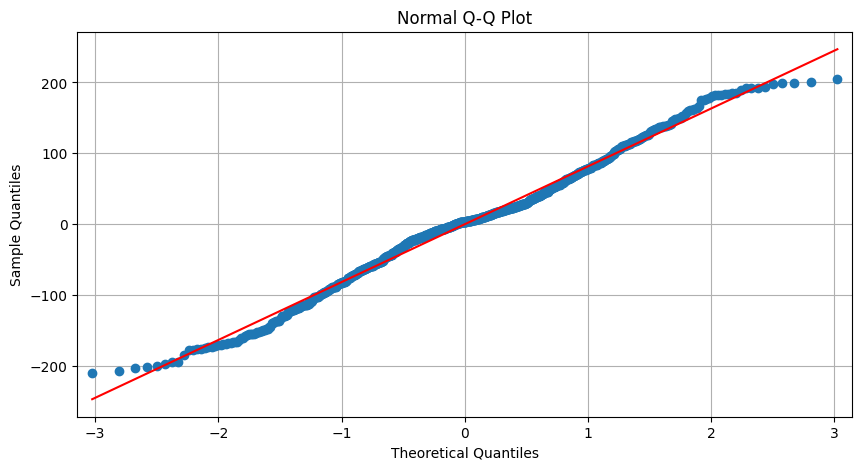

In [43]:
# Residuals vs Fitted
residuals = model.resid
fitted = model.fittedvalues
plt.scatter(fitted, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs Fitted')
plt.show()

# Q-Q Plot
sm.qqplot(residuals, line='s')
plt.title('Normal Q-Q Plot')
plt.show()


After performing the residual analysis, heteroskedasticity (funnel shape) was observed. This indicates that the model's forecasting accuracy decreases as the sales amount increases. The funnel shape means that the model's error distribution is not constant. When the predicted sales amounts are small, the model makes little error (points close to the zero line). When the predicted amounts increase, the error range "swells".  

The most common solution is to use a logarithmic transformation for the target variable (y = np.log(df['Sales'])), if we consider it necessary. In fact, I had performed logarithmization and checked whether the model got better, but the model only got worse. Logarithmization broke the model - the residuals graph became arch-like, there was no longer a linear relationship. Since the logarithmic model did not work, I deleted it from the project, because it is not purposeful.  

In the Normal Q-Q Plot graph, the points are very precisely located along the red line. This confirms that the errors are normally distributed.

Next, performing the **prediction on the test data**. We will use all the variables selected at the beginning, as they were used to train this model.

In [58]:
# Prediction and metrics on the test data
pred_test = model.predict(sm.add_constant(X_test))

r2 = r2_score(y_test, pred_test)
mae = mean_absolute_error(y_test, pred_test)
rmse = mean_squared_error(y_test, pred_test) ** 0.5

print({"R2_test": r2, "MAE_test": mae, "RMSE_test": rmse})

{'R2_test': 0.9014751606096123, 'MAE_test': 59.53709396800661, 'RMSE_test': 80.06202689467587}


The model accuracy indicator R^2_test = 0.90 means that the model is able to explain 90% of the sales variations in the test data.
The test result (0.90) is even slightly higher than the training set result (R^2 = 0.887). This shows that the model is not “overfitted” and works well with new, unseen data.

MAE and RMSE show the practical error of the model in monetary terms:  
MAE (59.54): on average, the forecast deviates by about €59.54 from the actual sales amount.  
RMSE (80.06): this indicator is higher than MAE, because it reacts more sensitively to large errors. This is normal in business - the model can perfectly predict average purchases, but it is more difficult to “guess” individual huge purchases (outliers) that were above the €1000 threshold in the graphs.

Next, creating **one more model with only those variables that were significant** in the first model, Unit Price and Quantity

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.886
Model:                            OLS   Adj. R-squared:                  0.886
Method:                 Least Squares   F-statistic:                     3097.
Date:                Sun, 22 Feb 2026   Prob (F-statistic):               0.00
Time:                        15:20:11   Log-Likelihood:                -4661.8
No. Observations:                 800   AIC:                             9330.
Df Residuals:                     797   BIC:                             9344.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -322.1599      8.711    -36.982      0.0

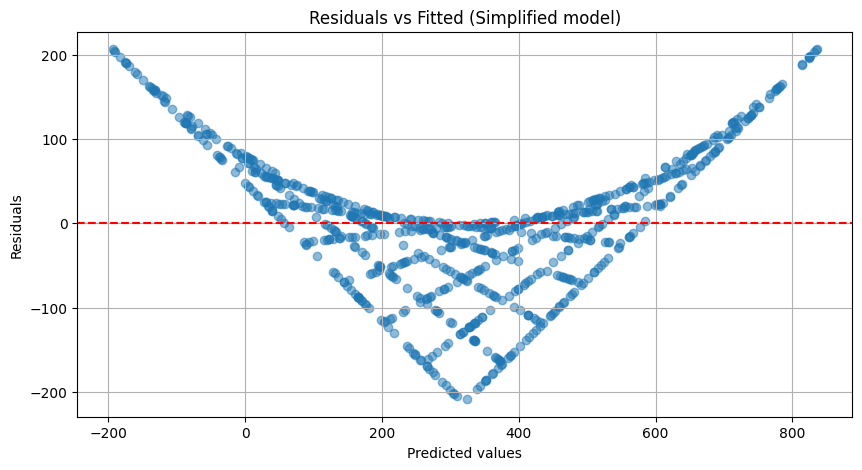

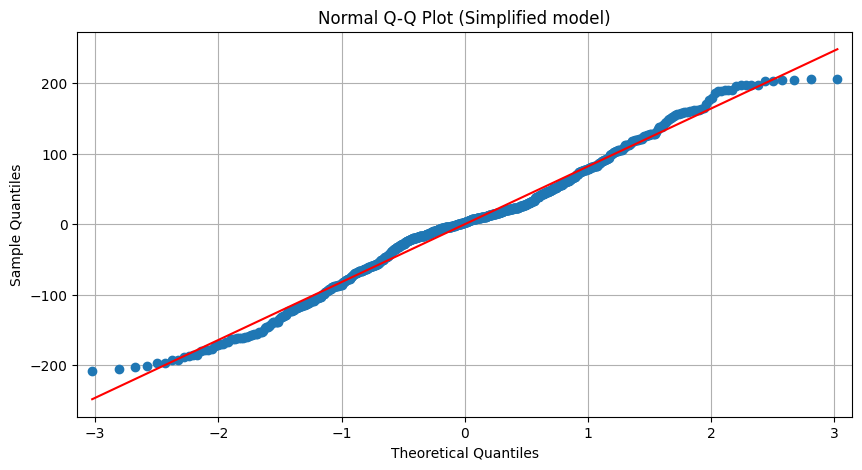

In [59]:
# We use only those variables that were significant in the first model, i.e. Unit Price and Quantity
significant_features = ["Unit price", "Quantity"]
target = "Sales"

X_simple = df[significant_features].astype(float)
y = df[target].astype(float)

X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_simple, y, test_size=0.2, random_state=42)

X_train_s_const = sm.add_constant(X_train_s)
simple_model = sm.OLS(y_train_s, X_train_s_const).fit()

print(simple_model.summary())

# residuals and qq grafikus
residuals_s = simple_model.resid
fitted_s = simple_model.fittedvalues

plt.figure(figsize=(10, 5))
plt.scatter(fitted_s, residuals_s, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted (Simplified model)')
plt.show()

sm.qqplot(residuals_s, line='s')
plt.title('Normal Q-Q Plot (Simplified model)')
plt.show()

Comparison. R-squared and Adj. R-squared (0.886) remained identical to the original model. This confirms that all other 11 variables (cities, gender, categories) had practically no impact on the model's ability to explain sales fluctuations.  

F-statistic (3097): This indicator jumped from 476.4 to 3097. This shows that the new model is much more stable and statistically "stronger", since it does not contain insignificant "noise".  

In [60]:
# Model evaluation with test data (two variables)

X_test_s_const = sm.add_constant(X_test_s)
pred_simple = simple_model.predict(X_test_s_const)

# metrics
r2_s = r2_score(y_test_s, pred_simple)
mae_s = mean_absolute_error(y_test_s, pred_simple)
rmse_s = mean_squared_error(y_test_s, pred_simple) ** 0.5

print({"R2_test": r2_s, "MAE_test": mae_s, "RMSE_test": rmse_s})

{'R2_test': 0.9042708171993605, 'MAE_test': 58.53704658032449, 'RMSE_test': 78.91796697006768}


Compared to the full model, the simplified bivariate model performed even better with the new data:

R2_test (0.904): Accuracy increased (from 0.901). The model now explains over 90.4% of actual sales.

MAE_test (€58.54): The mean error decreased by €1 (from €59.54).

RMSE_test (€78.92): The error also decreased (from €80.06). This means that the model makes fewer large forecasting errors.

**Actual vs Predicted**  

R², MAE, RMSE are numbers — are not clear enough.
Actual vs Predicted scatter plot allows you to see:
- whether the model systematically overestimates/underestimates
- whether there are specific areas where the model is wrong

In [63]:
# Actual vs Predicted

def plot_actual_vs_predicted(y_true, y_pred, model_name="Model"):
    """
    Visualizes model accuracy: how well predictions match actual values.
    In an ideal model, all points would lie on the red diagonal line (y=x).
    """
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    
    r2 = r2_score(y_true, y_pred)
    
    fig, ax = plt.subplots(figsize=(7, 6))
    
    # Scatter plot
    ax.scatter(y_true, y_pred, alpha=0.4, color='steelblue', edgecolors='white', linewidth=0.3, s=40)
    
    # ideal Line (y = x)
    min_val = min(y_true.min(), y_pred.min())
    max_val = max(y_true.max(), y_pred.max())
    ax.plot([min_val, max_val], [min_val, max_val], 'r--', linewidth=2, label='Identity Line (y=x)')
    
    ax.set_xlabel('Actual Values', fontsize=12)
    ax.set_ylabel('Predicted Values', fontsize=12)
    ax.set_title(f'{model_name}\nActual vs Predicted | R² = {r2:.3f}', fontsize=13)
    ax.legend()
    ax.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    mean_bias = (y_pred - y_true).mean()
    print(f"\n--- Analysis for: {model_name} ---")
    if mean_bias > 0:
        print(f" Bias Warning: The model OVERESTIMATES values by an average of {mean_bias:.2f} units.")
    elif mean_bias < 0:
        print(f" Bias Warning: The model UNDERESTIMATES values by an average of {abs(mean_bias):.2f} units.")
    else:
        print(" Success: The model shows no systematic bias.")

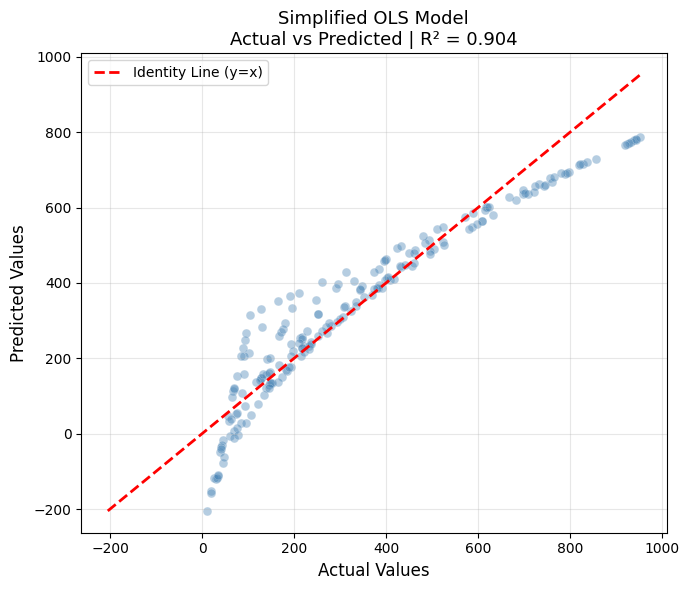


--- Analysis for: Simplified OLS Model ---
 Bias Warning: The model UNDERESTIMATES values by an average of 7.11 units.


In [64]:
# Using y_test_s (tikri) ir pred_simple (prognozės)
plot_actual_vs_predicted(y_test_s, pred_simple, "Simplified OLS Model")

Systematic Underestimation (Bias)
The analysis reveals a negative bias of 7.11 units. On average, the model predicts values that are slightly lower than the actual observed values. This is known as "underestimation."

Performance Across Different Ranges
Low to Mid Range (0–400): The model is highly reliable. Most data points are tightly clustered around the red Identity Line, showing that predictions are very close to reality.

High Range (>600): The accuracy decreases. You can see that as the values get higher, the points tend to fall further below the red line. This suggests that the model struggles to capture the full impact of cases with very high values.

While the model is generally very accurate, it is "conservative." It might slightly under-predict the sales at higher levels.

## Time series analysis

Objective: To assess sales dynamics over time using aggregated sales by day or month.

In [65]:
# Preparing date format and aggregating 'Sales'
df["Date"] = pd.to_datetime(df["Date"])
daily_sales = df.groupby("Date")["Sales"].sum().sort_index()
daily_sales.head()


Date
2019-01-01    4745.1810
2019-01-02    1945.5030
2019-01-03    2078.1285
2019-01-04    1623.6885
2019-01-05    3536.6835
Name: Sales, dtype: float64

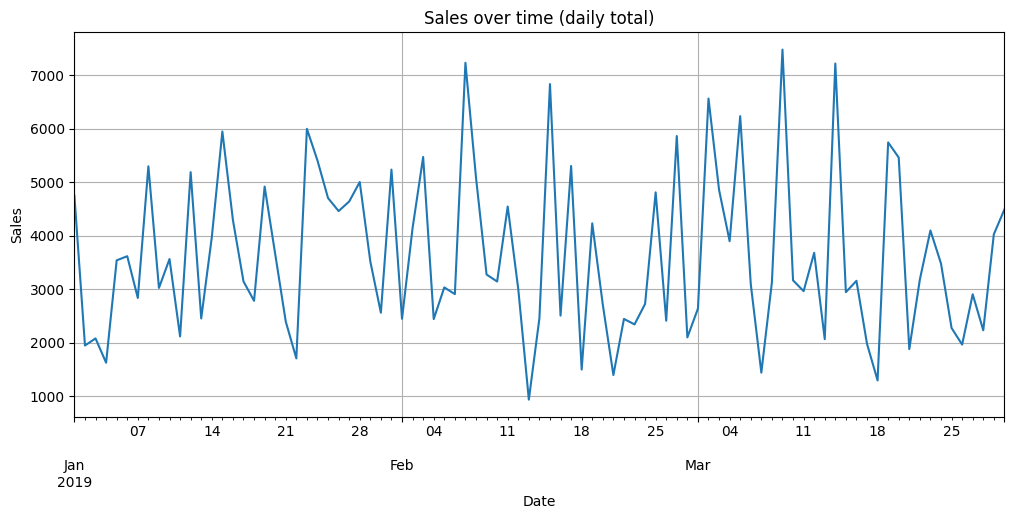

In [67]:
plt.figure(figsize=(12, 5))
daily_sales.plot(title="Sales over time (daily total)")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.show()


High Volatility:
Sales fluctuate significantly almost daily – from lows (around 1000) to highs (over 7000).
In trading, this means that the flow of buyers is not uniform.

Visible traces of seasonality:
Although the graph looks chaotic, we see recurring “teeth”:
In mid-February and mid-March we see clear “pits” and “peaks”.

Extreme deviations (Outliers):
We see several points on the graph that fall out of the general context:
Early March: we see the highest peak (around 7500). This could be a promotion, a sale, etc.
Mid-February: we see a sharp decline below 1000.

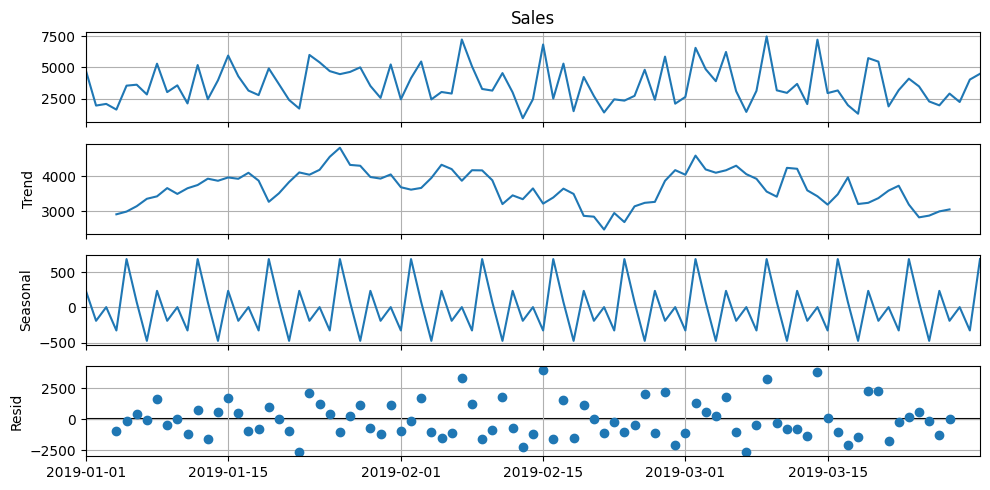

In [68]:
# decomposition
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(daily_sales, model='additive')
decomposition.plot()
plt.show()

1. Sales (Original data)
These are the original daily sales. We see a very high variability (from ~1000 to ~7500). Such a graph alone is too complicated for forecasting, so decomposition is necessary.

2. Trend (Trend)
We see that the trend is not uniform. We see growth in January, a peak in early February, and then a subsequent decline until mid-February. At the beginning of March, a sharp rise is seen again. Sales do not have one stable direction (e.g., constant growth). They fluctuate. This may indicate a response to external factors: seasonality or marketing campaigns.

3. Seasonal (Seasonal)
This graph showed a very clear and strong weekly rhythm. The graph consists of uniform, repeating cycles. We see a sharp peak that repeats itself every 7 days.
This means that buyer behavior is very predictable within a week. There is one specific day (peaking at over 500 units above average) when sales always skyrocket.
A forecasting model could tell when the next “surge” will occur.

4. Resid (Residuals / Noise)
This is the part that cannot be explained by either trend or seasonality.
We can see that most of the points are around zero, but there are a few points where they reach 2500 or even -2500.
These could be random events. When building a model, these points are “spikes” that the model should ignore to avoid making a mistake in its forecast.

In [78]:
# The decomposition showed a strong weekly cycle, but it is important to clarify which day is the peak day.

def weekly_sales_analysis(daily_sales):
    """
    Visualizes how sales vary by the day of the week.
    Useful for determining which days require more resource allocation.
    """
    df_temp = daily_sales.reset_index()
    df_temp.columns = ['Date', 'Sales']
    
    # Create a Day of Week column
    df_temp['Day of Week'] = df_temp['Date'].dt.day_name()
    day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    
    # Calculate means per day
    averages = df_temp.groupby('Day of Week')['Sales'].mean().reindex(day_order)
    
    # Plotting
    fig, ax = plt.subplots(figsize=(10, 5))
    
    # Bar chart with highlighting for the peak day
    bars = ax.bar(averages.index, averages.values, 
                  color=['steelblue' if v < averages.max() else 'tomato' for v in averages.values])
    
    # Add a horizontal line for the overall average
    overall_mean = averages.mean()
    ax.axhline(overall_mean, color='orange', linestyle='--', linewidth=1.5, 
               label=f'Overall Average: {overall_mean:.0f}')
    
    ax.set_title('Average Sales by Day of the Week', fontsize=14)
    ax.set_xlabel('Day of the Week')
    ax.set_ylabel('Average Sales ($)')
    ax.legend()
    
    plt.xticks(rotation=30)
    plt.tight_layout()
    plt.show()
    
    # Insights
    best_day = averages.idxmax()
    worst_day = averages.idxmin()
    
    print(f"\nPeak Sales Performance: {best_day} (${averages.max():.0f})")
    print(f"Lowest Sales Day: {worst_day} (${averages.min():.0f})")

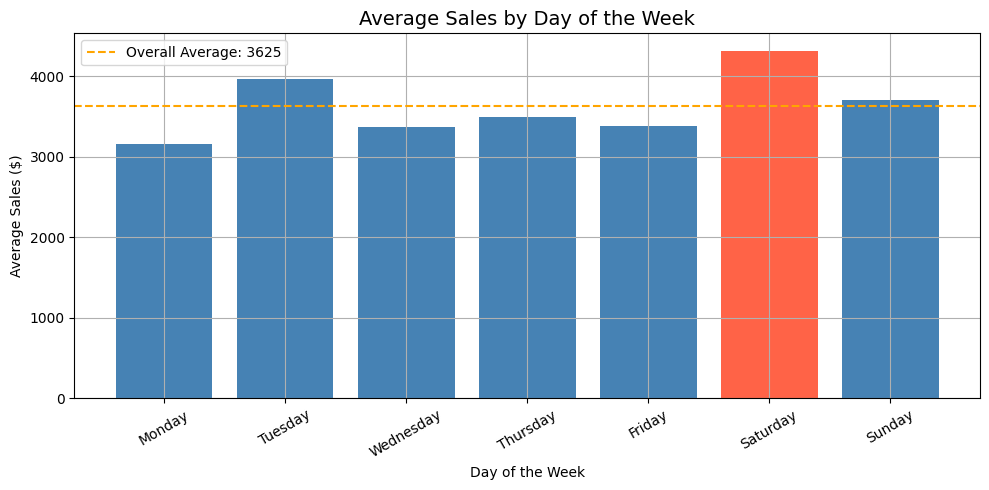


Peak Sales Performance: Saturday ($4317)
Lowest Sales Day: Monday ($3158)


In [79]:
weekly_sales_analysis(daily_sales)

Saturday is the most successful day of the week, with an average that significantly exceeds other days and reaches more than $4,000.  

The second strongest day is Tuesday. Although the weekend dominates, Tuesday shows an unexpected jump in sales (almost $4,000), surpassing even Sunday.

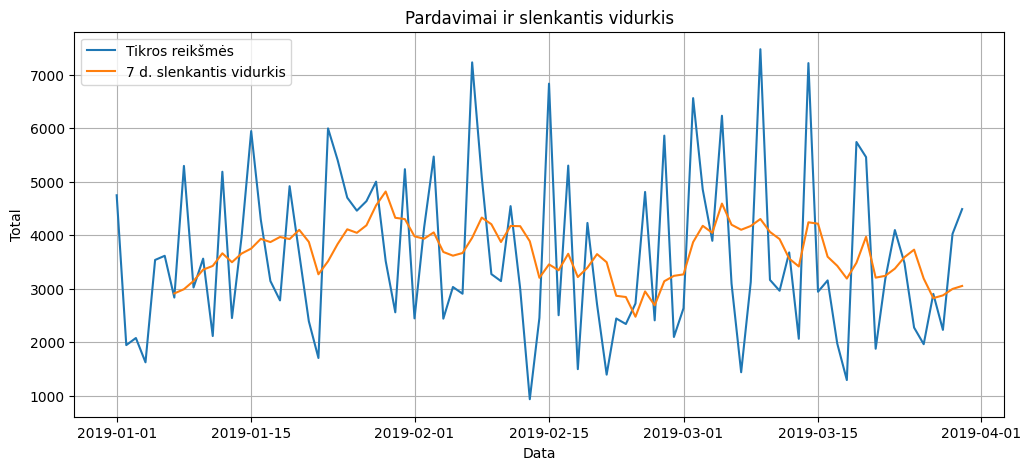

In [80]:
# Moving average
window = 7
daily_sales_ma = daily_sales.rolling(window=window).mean()

plt.figure(figsize=(12, 5))
plt.plot(daily_sales.index, daily_sales.values, label="Tikros reikšmės")
plt.plot(daily_sales_ma.index, daily_sales_ma.values, label=f"{window} d. slenkantis vidurkis")
plt.title("Pardavimai ir slenkantis vidurkis")
plt.xlabel("Data")
plt.ylabel("Total")
plt.legend()
plt.show()


In this graph, the orange line (7-day moving average) does the “data smoothing” job.

The actual values ​​(blue line) are incredibly chaotic. However, the orange line shows that the overall sales level fluctuates between 3,000 and 4,500.

While sales jump to 7,000 or drop to 1,000 on individual days, on average the business remains in a stable zone. There is no obvious long-term increase or decrease over the entire three months.

7-days sales forecast:
2019-03-31    3745.559799
2019-04-01    3139.643574
2019-04-02    4035.830603
2019-04-03    3334.146307
2019-04-04    3411.871954
2019-04-05    3599.444173
2019-04-06    4325.022586
Freq: D, dtype: float64


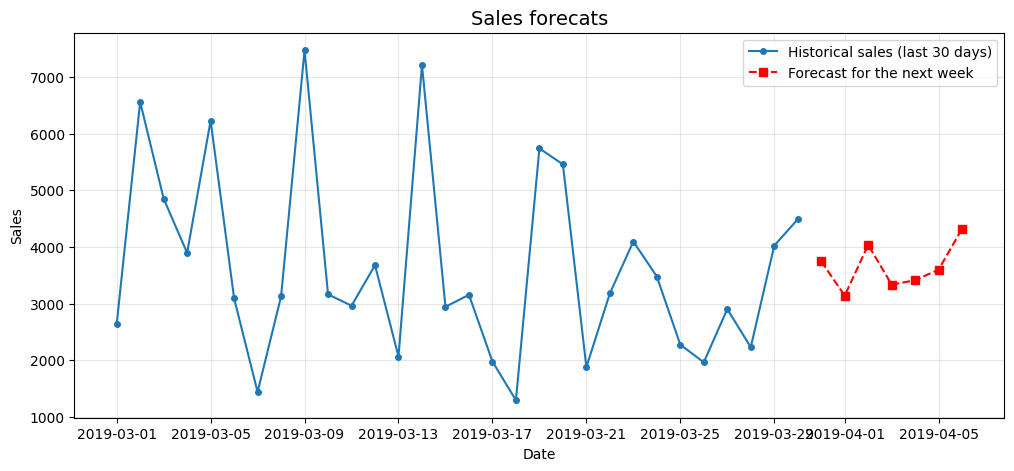

In [83]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

daily_sales.index.freq = 'D'

# We create and train the model
# We use the 'add' (additive) model, which is perfect for stable sales
model = ExponentialSmoothing(daily_sales, trend='add', seasonal='add', seasonal_periods=7)
model_fit = model.fit()

# Forecasting for 7 days
forecast = model_fit.forecast(7)

print("7-days sales forecast:")
print(forecast)

plt.figure(figsize=(12, 5))

plt.plot(daily_sales.tail(30), label='Historical sales (last 30 days)', marker='o', markersize=4)
plt.plot(forecast, label='Forecast for the next week', color='red', linestyle='--', marker='s')

plt.title('Sales forecats', fontsize=14)
plt.xlabel('Date')
plt.ylabel('Sales')
plt.grid(True, alpha=0.3) 
plt.legend()
plt.show()

The forecast clearly replicates the "surge" seen in historical data. The model predicts that after the initial drop, sales will start to rise again consistently. The peak is on April 6-7. The model predicts that by the end of the week, sales will again reach the 4000+ euro mark.

This forecast is based only on the past trend.
It would be appropriate to perform a data split, i.e. one part of the time series is dedicated to training the model, the other for forecasting and comparison with test data.

In [84]:
# Spliting test
# Taking last 7 days for test
train_data = daily_sales.iloc[:-7]
test_data = daily_sales.iloc[-7:]

# Training model with only train_data
model_backtest = ExponentialSmoothing(train_data, trend='add', seasonal='add', seasonal_periods=7)
model_fit_backtest = model_backtest.fit()

# Prediction for the hidden days
backtest_forecast = model_fit_backtest.forecast(7)

# metrics
mae = mean_absolute_error(test_data, backtest_forecast)
rmse = np.sqrt(mean_squared_error(test_data, backtest_forecast))

print(f"MAE: {mae:.2f} eur")
print(f"RMSE: {rmse:.2f} eur")

MAE: 1311.85 eur
RMSE: 1500.44 eur


MAE: The forecast is on average wrong by 1311.85 euros each day.  
Since RMSE (1500.44) is greater than MAE (1311.85), this indicates that there are large deviations in the data.  
The model has days when it is wrong by a large amount. This is most likely due to those deviations.  

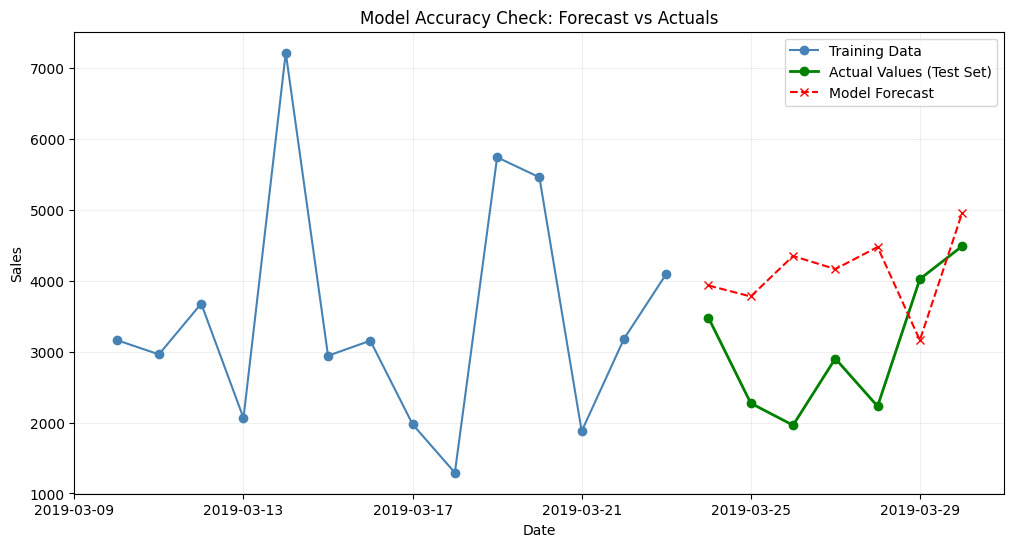

In [85]:
plt.figure(figsize=(12, 6))

# Displaying the last 21 days in total
plt.plot(train_data.tail(14).index, train_data.tail(14).values, label='Training Data', color='steelblue', marker='o')
plt.plot(test_data.index, test_data.values, label='Actual Values (Test Set)', color='green', marker='o', linewidth=2)
plt.plot(backtest_forecast.index, backtest_forecast.values, label='Model Forecast', color='red', linestyle='--', marker='x')

plt.title('Model Accuracy Check: Forecast vs Actuals')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True, alpha=0.2)
plt.show()

The model's sales forecast (red) tries to track the actual values ​​(green), but the model still overestimates sales slightly. This shows that the model tends to expect a larger sales effect than it actually occurs in reality (test).

In [86]:
# MAPE metrics for backtest results
# MAE and RMSE depend on the scale of the sales (e.g., in euros).
# MAPE (Mean Absolute Percentage Error) is more universal — it shows the error as a percentage,
# making it easier to interpret and compare across different models.

def calculate_mape(y_true, y_pred):
    """
    Calculates MAPE — Mean Absolute Percentage Error.
    Returns the value as a percentage (e.g., 35.2 means a 35.2% error).
    """
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    
    # Protection against division by zero
    # np.where replaces 0 with 1 to avoid NaN results
    return np.mean(np.abs((y_true - y_pred) / np.where(y_true == 0, 1, y_true))) * 100

# Evaluation Guidelines:
# < 10%   — Excellent model
# 10–20%  — Good model
# 20–50%  — Acceptable (common in daily sales/patient flow forecasting)
# > 50%   — Unreliable model

In [87]:
# Usage after backtest MAE/RMSE calculation:
mape_value = calculate_mape(test_data.values, backtest_forecast.values)
print(f"MAPE: {mape_value:.1f}%")
print(f"Interpretation: On average, the model's prediction is off by {mape_value:.1f}% from the actual daily amount.")

MAPE: 53.8%
Interpretation: On average, the model's prediction is off by 53.8% from the actual daily amount.


**SARIMA model**

In [88]:
# ADF Stationarity Test (BEFORE SARIMA)
# The SARIMA model requires knowing the integration order (d, D).
# Professional practice — always present the ADF test results before applying ARIMA/SARIMA.

from statsmodels.tsa.stattools import adfuller

def adf_test(series, title="Time Series"):
    """
    Performs the Augmented Dickey-Fuller test and provides a clear interpretation.
    H0: The series is non-stationary (has a unit root).
    Ha: The series is stationary.
    """
    result = adfuller(series.dropna(), autolag='AIC')
    
    adf_stat      = result[0]
    p_value       = result[1]
    critical_vals = result[4]
    
    print(f"\n{'='*55}")
    print(f"ADF Test: {title}")
    print(f"{'='*55}")
    print(f"ADF Statistic   : {adf_stat:.4f}")
    print(f"P-value         : {p_value:.4f}")
    print(f"Critical Values : 1% = {critical_vals['1%']:.4f} | "
          f"5% = {critical_vals['5%']:.4f} | 10% = {critical_vals['10%']:.4f}")
    
    if p_value < 0.05:
        print("\nConclusion: Reject H0 — The series is STATIONARY (d=0 or differencing is already applied).")
    else:
        print("\nConclusion: Fail to reject H0 — The series is NON-STATIONARY, differencing is required (use d=1).")

# Interpretation:
# If p > 0.05 — the series is non-stationary; this JUSTIFIES why SARIMA uses d=1.
# If p < 0.05 — you can use d=0.

In [89]:
adf_test(daily_sales, "Daily Sales")


ADF Test: Daily Sales
ADF Statistic   : -7.6549
P-value         : 0.0000
Critical Values : 1% = -3.5079 | 5% = -2.8954 | 10% = -2.5848

Conclusion: Reject H0 — The series is STATIONARY (d=0 or differencing is already applied).


The Augmented Dickey-Fuller (ADF) test was performed to check for stationarity in the daily data. The resulting p-value (p < 0.001) and an ADF statistic of -7.65 (which is significantly lower than the 1% critical value) allow us to reject the null hypothesis. This confirms that the time series is stationary, providing a solid foundation for the SARIMA forecasting model.

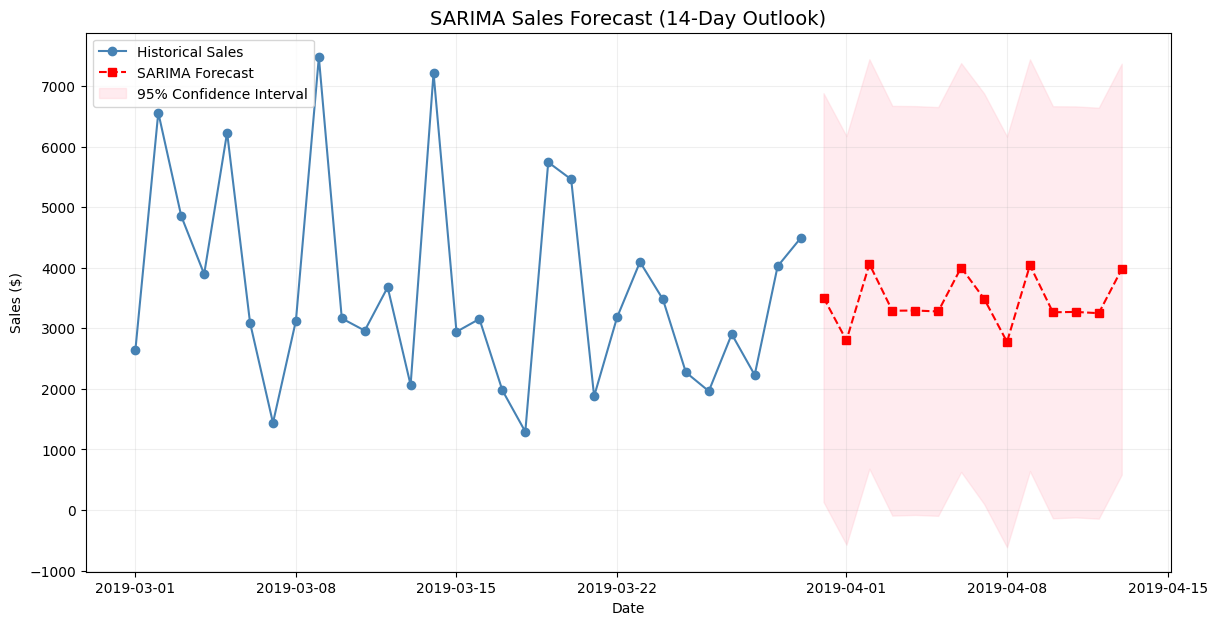

In [91]:
# Set frequency to Daily
daily_sales.index.freq = 'D'

# Define the SARIMA model
# order=(p, d, q), seasonal_order=(P, D, Q, s)
sarima_model = sm.tsa.statespace.SARIMAX(daily_sales,
                                        order=(1, 1, 1),
                                        seasonal_order=(1, 1, 1, 7),
                                        enforce_stationarity=False,
                                        enforce_invertibility=False)

# Fit the model
sarima_results = sarima_model.fit(disp=False)

# Define forecast period (14 days)
forecast_steps = 14
pred = sarima_results.get_forecast(steps=forecast_steps)
pred_ci = pred.conf_int() # Confidence intervals

# Visualization
plt.figure(figsize=(14, 7))

# Plot the last 30 days of historical data
plt.plot(daily_sales.tail(30).index, daily_sales.tail(30).values, 
         label='Historical Sales', color='steelblue', marker='o')

# Plot the SARIMA forecast
plt.plot(pred.predicted_mean.index, pred.predicted_mean.values, 
         label='SARIMA Forecast', color='red', linestyle='--', marker='s')

# Plot the 95% Confidence Interval
plt.fill_between(pred_ci.index,
                 pred_ci.iloc[:, 0],
                 pred_ci.iloc[:, 1], color='pink', alpha=0.3, label='95% Confidence Interval')

plt.title('SARIMA Sales Forecast (14-Day Outlook)', fontsize=14)
plt.xlabel('Date')
plt.ylabel('Sales ($)')
plt.legend()
plt.grid(True, alpha=0.2)
plt.show()


The blue line represents actual sales for March (2019). We see a lot of variability.
The red dashed line (SARIMA forecast) calculates the future forecast for the first 14 days of April.
The light pink zone (95% error limit) is the confidence interval. It shows that with a 95% probability the actual sales will fall within this range.

The SARIMA model successfully identified a recurring cycle, but there is a lot of uncertainty: the pink zone is very wide. This means that the model is not completely confident about the exact numbers. Statistically, this indicates a lot of variance in the data.

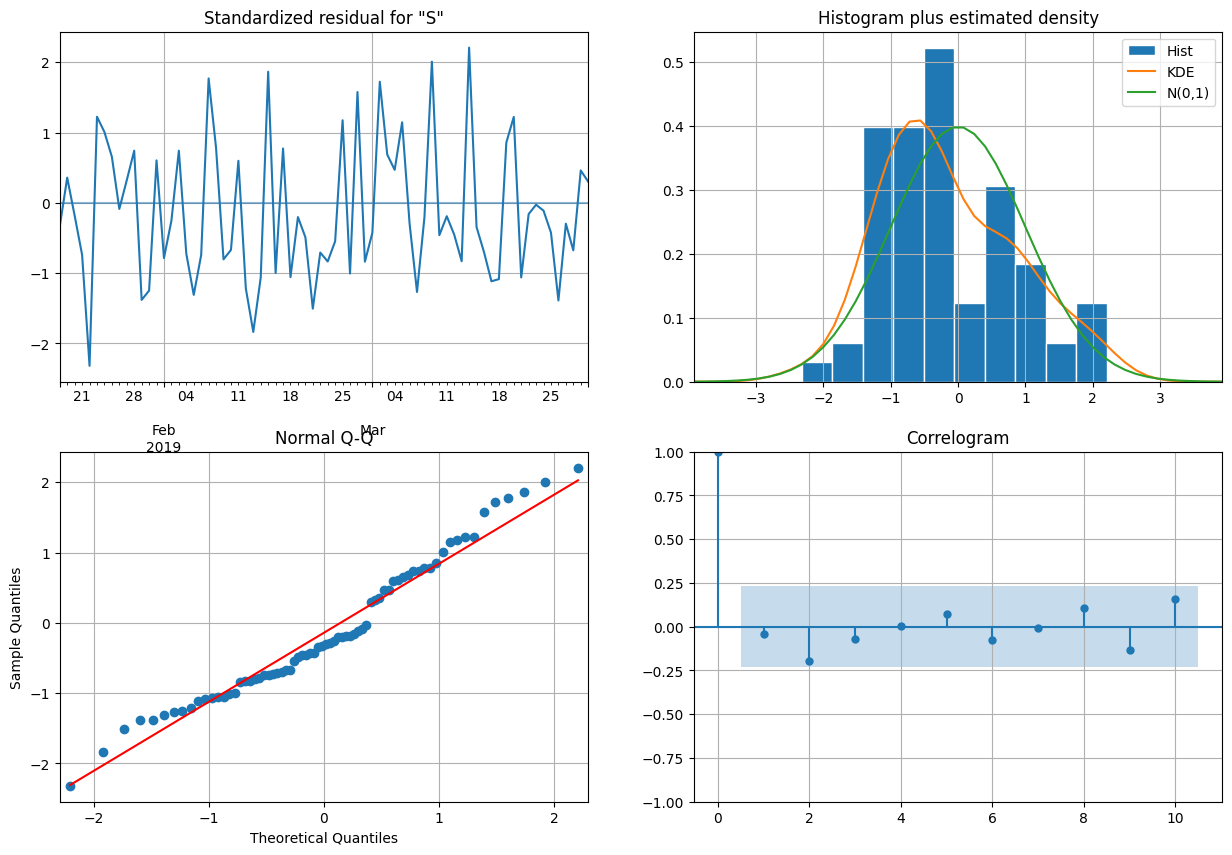

In [92]:
# Sarima diagnostics
sarima_results.plot_diagnostics(figsize=(15, 10))
plt.show()

Standardized Residuals – This plot shows the model errors over time. The points are randomly distributed around zero. There are no obvious “waves” or trends. The model captures the underlying trend quite well. This resembles “white noise”, which is a good sign – meaning there is no systematic bias in the model.

Histogram and estimated density – compares the error distribution with an ideal normal distribution curve. The orange line (KDE – the true error density) does not exactly coincide with the green line (theoretical normal distribution). We see a small “left skew” (negative asymmetry). Conclusion: The errors are approximately normally distributed, but not ideally. In practice, this is often tolerated unless the deviation is extreme.

Normality Q-Q plot – a more sensitive way to check whether the errors follow a normal distribution. The blue points should lie on the red line. We can see that at the ends (especially on the left side) the points jump off the line a little. This confirms that the error tails are slightly different from the ideal normal distribution. However, in the central part the points stay on the line, so the model is quite reliable.

Correlogram – checks whether there are any recurring patterns left in the errors. All the blue vertical lines (except the first one at 0, which is always equal to 1) are in the light blue zone. This is a great result. This means that there is no significant autocorrelation in the errors. The model has “sucked” all the useful information out of the data.

## Conclusions

### 1. EDA (Exploratory Data Analysis) Summary

* Strong positive correlation: A clear linear relationship was observed between the quantity of goods sold and the final sales amount 'Sales'.
* Heteroskedasticity: The initial data has a "funnel" effect - as sales amounts increase, their dispersion (variation) also increases.
* Data distribution: Although sales amounts vary, the model errors are normally distributed, which allows for reliable statistical insights.

### 2. Interpretation of confidence intervals (CI)

* We are 95% sure that each additional unit of the product in the `Quantity` basket increases turnover on average from 56.31 EUR to 60.18 EUR.
* An increase in the product price `Unit price` by 1 EUR increases the transaction amount on average between 5.58 EUR and 6.02 EUR.

### 3. Hypothesis Testing Conclusions

* H0 (Null Hypothesis): Product price and quantity do not affect sales.
* Ha (Alternative Hypothesis): Product price and quantity have a statistically significant effect on sales.
* P-value and decision: Since the p-value of both variables is 0.00, we reject the null hypothesis.
* Interpretation: We can scientifically confirm that both price and quantity are critical factors in predicting sales revenue.

### 4. Summary of Regression Results

* Model Accuracy: The simplified model with only two variables achieved an extremely high R^2, which means that the model correctly predicted over 90% of real sales.
* Errors: The mean error of prediction (MAE) is 58.54 EUR.
* Meaning of coefficients: Unit price (5.80). Each euro of price increases turnover by almost 6 euros.
* Quantity (58.24): Each additional unit in the basket is the main revenue driver, adding on average over 58 €.

### 5. Time series analysis

* The analyzed sales period (January-March 2019) is not characterized by a single, consistent growth or decline trend. Sales fluctuate around a stable average value (approximately 3000-4500 euros per day), which indicates that the market is mature and stable.

* Seasonality: Decomposition analysis revealed a very strong and regular 7-day (weekly) cycle. This means that buyer behavior is regular - on certain days of the week, the demand for goods systematically jumps up.

* Noise and deviations: the data is full of random “spikes” that are not related to the overall trend or seasonality. Such deviations can be associated with one-time promotions or specific external events.

* Model selection: The simple forecast and the more complex SARIMA model successfully captured the weekly rhythm. The forecast line replicated historical ups and downs, so it is more reliable than the simple average.

* Accuracy: Backtesting (checking with hidden data) showed that the model is able to predict the direction of sales, but it is more difficult for it to accurately predict the amplitude due to the large random deviations.

### 6. Recommendations for business

* Focus on increasing the basket: Since the quantity of goods `Quantity` has the greatest mathematical weight in the final amount, it is recommended to apply `Bundle` offers (e.g., a discount is applied when buying 3 or more goods), as this directly and predictably increases revenue.

* Pricing stability: The model shows that price changes `Unit price` have a stable and predictable effect, so you can experiment more boldly with introducing higher-value goods into the assortment.
* Simplicity of forecasting: Businesses do not need to collect complex demographic data (gender, city), as operational data on prices and quantities is sufficient for turnover forecasts.